## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 7. Востановление пропусков и прогноз значений временного ряда.**


#### **7.1 Аналитечкие методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с базовыми, аналитическими методами восстановления временных рядов.
Для выполнения данного пункта из каждой группы методов, представленных в ***табл. 7.1*** вам необходимо выбрать по одному методу восстановления ряда. При работе с первой группой, вам необходимо самостоятельно реализовать выбранный метод.  

**Табл. 7.1** - Группы аналитических методов восстановления.
№|Название группы|Модели и методы|
--|----|----|
1|Заполнение существующими значениями ряда|Средним, медианной, Hot-Deck|
2|Заполнение на основе близки значений|[Интерполяция](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html),  [KNNi](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)|
3|На основе матричных разложений|[CD-Rec](#Fixme:Дат ссылку), [SVD](https://pypi.org/project/fancyimpute/)|

##### 7.1.1 Загрузка и подготовка данных

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path_data = Path('datasets')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,0]
print(madrid.shape)

(25000,)


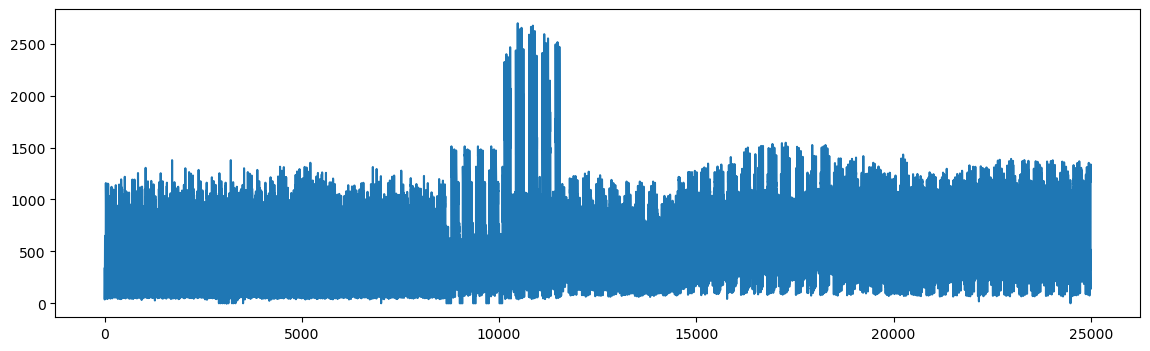

In [4]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(madrid[:])
plt.show()

Самостоятельно реализуйте функцию, принимающую на вход многомерный временной ряд и возвращающий:
1. Все подпоследовательности временного ряда, в которых некоторые значения временного ряда были заменены nan значениями.
2. Индексы пропущенных значений
   
Процент пропущенных значений должен регулироваться отдельным параметром.


Индексы пропущенных значений: [7, 35, 83, 38, 39, 89, 87, 29, 53, 55, 5, 72, 99, 94, 54, 77, 57, 41, 91, 27, 22, 37, 46, 6, 23]
Подпоследовательности с NaN: [[5, 6, 7], [22, 23], [27], [29], [35], [37, 38, 39], [41], [46], [53, 54, 55], [57], [72], [77], [83], [87], [89], [91], [94], [99]]


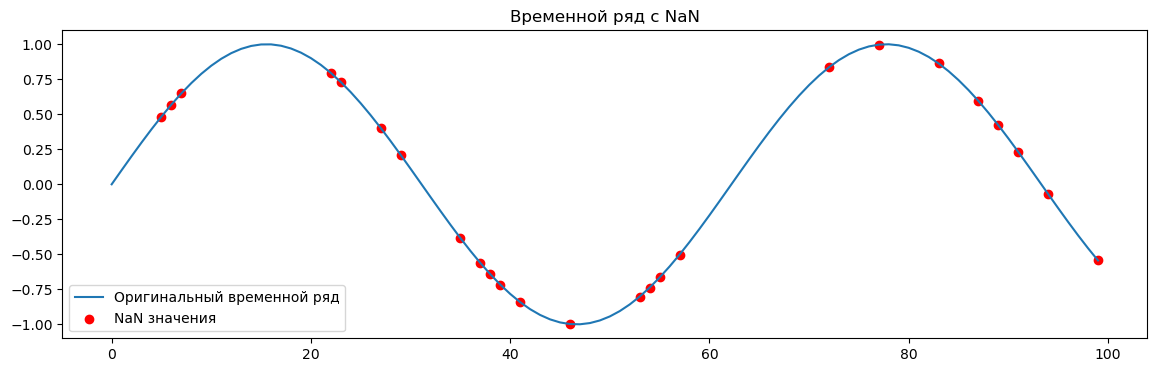

In [6]:
import numpy as np
import pandas as pd

def add_nan(time_series, percent=0.25):
    """
    Add NaN values to a time series at a specified percentage.

    Parameters:
    time_series (array-like): Input time series data.
    percent (float): Percentage of values to replace with NaN (between 0 and 1).

    Returns:
    list: Subarrays where NaNs are present.
    list: Indices of NaN values.
    """
    # Copy the original time series to avoid modifying it
    ts = np.array(time_series, dtype=np.float64)
    total_length = len(ts)
    
    # Calculate the number of NaNs to insert
    num_nans = int(total_length * percent)
    
    # Choose random indices to replace with NaN
    nan_indices = np.random.choice(total_length, num_nans, replace=False)
    
    # Replace selected indices with NaN
    ts[nan_indices] = np.nan
    
    # Find all subarrays with NaNs
    nan_indices_list = nan_indices.tolist()
    nan_subarrays = []
    
    # Use pandas to find continuous segments with NaNs
    df = pd.Series(ts)
    is_nan = df.isna()
    
    # Group by contiguous NaN sequences
    for key, group in df[is_nan].groupby((~is_nan).cumsum()):
        nan_subarrays.append(group.index.tolist())
    
    return nan_subarrays, nan_indices_list

# Пример использования функции
import matplotlib.pyplot as plt

# Исходный временной ряд
time_series = np.sin(np.linspace(0, 10, 100))  # Создать временной ряд
nan_subarrays, nan_indices = add_nan(time_series, percent=0.25)

# Печать результатов
print("Индексы пропущенных значений:", nan_indices)
print("Подпоследовательности с NaN:", nan_subarrays)

# Визуализация
plt.figure(figsize=(14, 4))
plt.plot(time_series, label='Оригинальный временной ряд')
plt.scatter(nan_indices, time_series[nan_indices], color='red', label='NaN значения')
plt.title('Временной ряд с NaN')
plt.legend()
plt.show()


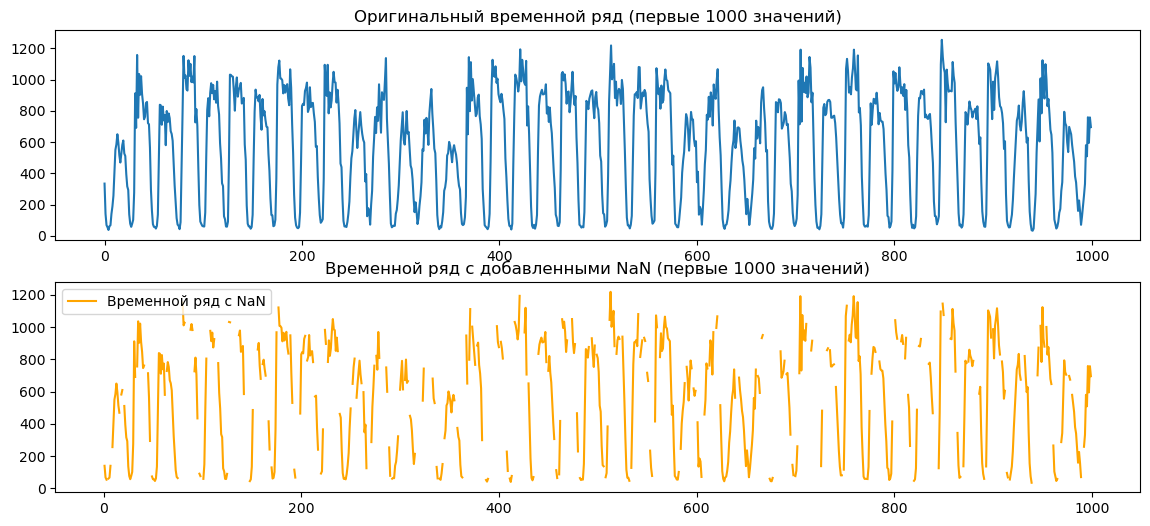

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def add_nan(time_series, percent=0.25):
    ts = np.array(time_series, dtype=np.float64)
    total_length = len(ts)
    num_nans = int(total_length * percent)
    nan_indices = np.random.choice(total_length, num_nans, replace=False)
    ts[nan_indices] = np.nan
    return ts, nan_indices.tolist()

# Добавление NaN в временной ряд `madrid`
madrid_with_nan, index = add_nan(madrid)

fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)

# Визуализация оригинального временного ряда
ax[0].plot(madrid[:1000])
ax[0].set_title('Оригинальный временной ряд (первые 1000 значений)')

# Визуализация временного ряда с NaN
ax[1].plot(madrid_with_nan[:1000], label='Временной ряд с NaN', color='orange')
ax[1].set_title('Временной ряд с добавленными NaN (первые 1000 значений)')

plt.legend()
plt.show()


In [11]:
recovery = {}

##### 7.1.2 Заполнение существующими значениями ряда


In [12]:
madrid_mean = madrid_with_nan.copy()
madrid_mean[index] = np.nanmean(madrid_mean)
recovery['mean'] = madrid_mean

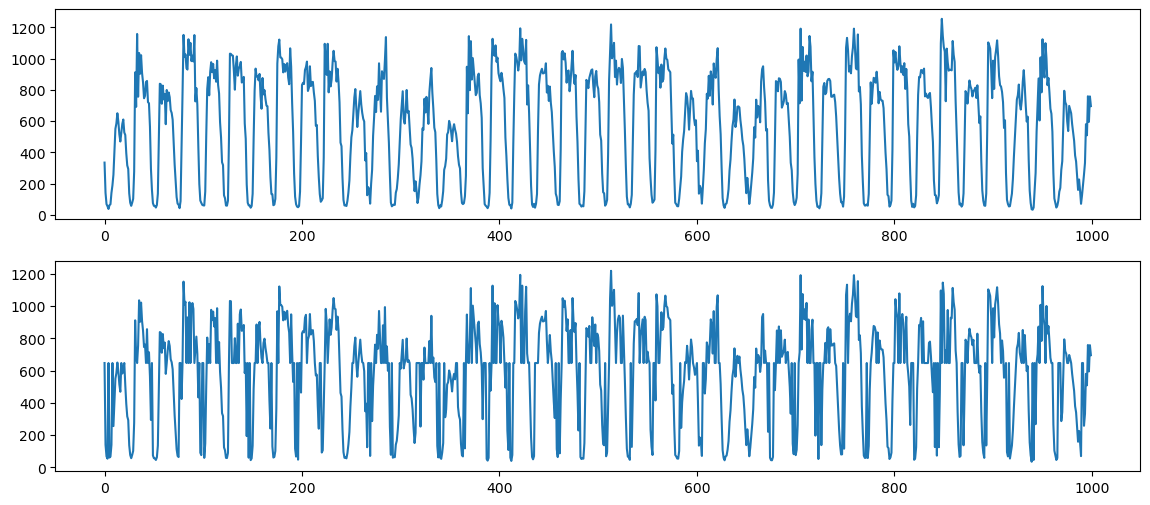

In [13]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_mean[:1000])
plt.show()

In [14]:
madrid_median = madrid_with_nan.copy()
madrid_median[index] = np.nanmedian(madrid_median)

In [15]:
recovery['median'] = madrid_median

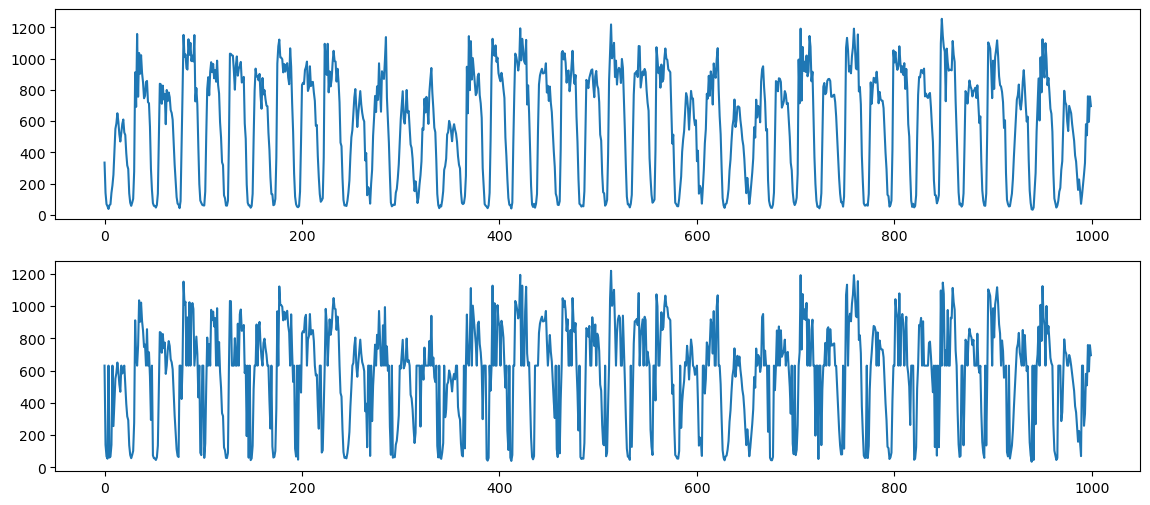

In [16]:
#madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_median[:1000])
plt.show()

Самостоятельно реализуйте один метод из первой группы ***табл. 7.1*** и проведите постановление данных, сохранив результаты восстановления.

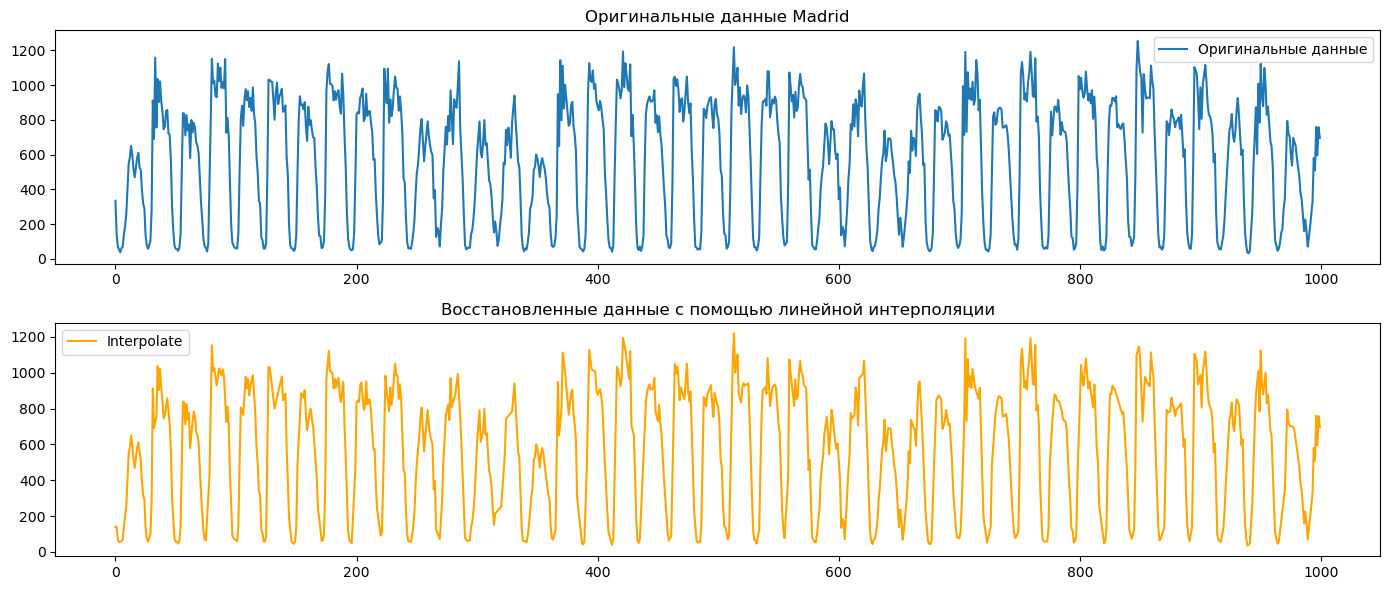

In [17]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt

# Пример данных с NaN (предположим, что madrid_with_nan уже существует и содержит nan)
# метод для восстановления данных с помощью линейной интерполяции
madrid_interpolated = np.copy(madrid_with_nan)

# Применение линейной интерполяции
madrid_interpolated[np.isnan(madrid_interpolated)] = np.interp(
    np.flatnonzero(np.isnan(madrid_interpolated)),  # Индексы nan
    np.flatnonzero(~np.isnan(madrid_interpolated)),  # Индексы не nan
    madrid_interpolated[~np.isnan(madrid_interpolated)]  # Значения не nan
)

# Для визуализации результатов восстановления с помощью линейной интерполяции
recovery['interpolated'] = madrid_interpolated

# Визуализация оригинальных данных и данных после интерполяции
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid[:1000], label='Оригинальные данные')
ax[0].set_title('Оригинальные данные Madrid')
ax[0].legend()

ax[1].plot(madrid_interpolated[:1000], label='Interpolate', color='orange')
ax[1].set_title('Восстановленные данные с помощью линейной интерполяции')
ax[1].legend()

plt.tight_layout()
plt.show()


##### 7.1.3 Заполнение на основе близких значений


Используя документацию одного из методов восстановления второй группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [12]:
from sklearn.impute import KNNImputer

In [18]:
def rolling_window(a, window, intersection=False):
    # result = torch.zeros(size=(a.shape[0],a.shape[1]))
    returns = []
    if intersection:  
        for i in range(0, a.shape[0]-window):
            returns.append(a[i:i + window])
    else:    
        for i in range(0, a.shape[0],window):
            returns.append(a[i:i + window])
    return np.stack(returns)
madrid_slice = rolling_window(madrid_with_nan, 100)


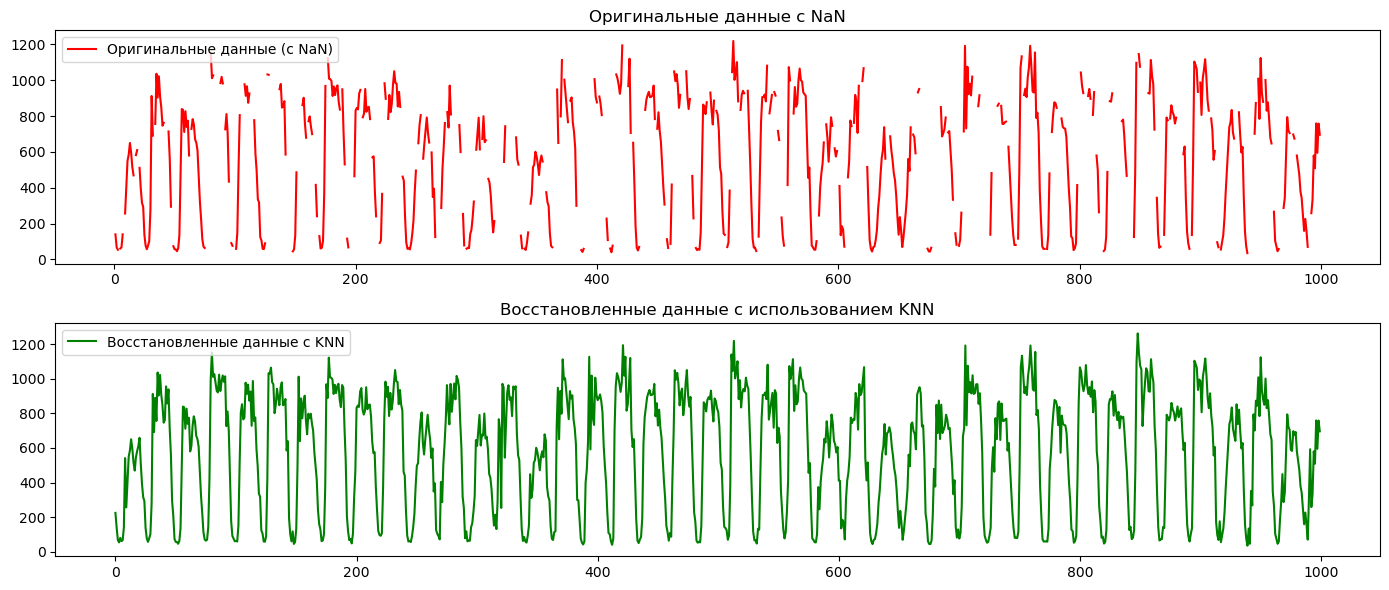

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Функция для создания скользящих окон
def rolling_window(a, window, intersection=False):
    returns = []
    if intersection:  
        for i in range(0, a.shape[0] - window + 1):
            returns.append(a[i:i + window])
    else:    
        for i in range(0, a.shape[0], window):
            returns.append(a[i:i + window])
    return np.stack(returns)

# Создание срезов данных
madrid_slice = rolling_window(madrid_with_nan, 100)

# Применение KNN imputer для заполнения пропусков
imputer = KNNImputer(n_neighbors=5)  # Выбор количества соседей
madrid_imputed = imputer.fit_transform(madrid_slice)

# Объединение восстановленных окон в один массив
# Например, если мы хотим вернуть результат к исходной форме
madrid_restored = np.zeros_like(madrid_with_nan)

# Заполнение восстановленных данных в оригинальной форме
for i in range(madrid_imputed.shape[0]):
    madrid_restored[i*100:(i+1)*100] = madrid_imputed[i]

# Сохранение восстановленных данных в словарь
recovery['knn_imputed'] = madrid_restored

# Визуализация оригинальных и восстановленных данных
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid_with_nan[:1000], label='Оригинальные данные (с NaN)', color='red')
ax[0].set_title('Оригинальные данные с NaN')
ax[0].legend()

ax[1].plot(madrid_restored[:1000], label='Восстановленные данные с KNN', color='green')
ax[1].set_title('Восстановленные данные с использованием KNN')
ax[1].legend()

plt.tight_layout()
plt.show()


##### 7.1.4 Заполнение на матричных преобразований

Используя документацию одного из методов восстановления третей группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [23]:
!pip install fancyimpute

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for cvxpy from https://files.pythonhosted.org/packages/53/07/cd1d98577172a28b1373b3d901c5f136c2cce1ff4d812d87d3d0e9811346/cvxpy-1.5.3-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/5b/10/429440cf9b841a5f8645f0aacc6a8da0a87cce4846d45e836f6b5f83be34/cvxopt-1.3.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for pytest from https://files.pythonhosted.org/packages/6b/77/7440a06a8ead44c7757a64362dd22df5760f9b12dc5f11b6188cd2fc27a0/pytest-8.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for nose from https://files.pythonhosted.org/packages/15/d8/dd071918c040f50fa1cf80da16423af51ff8ce4a0f2399b7bf8de45ac3d9/nose-1.3.7-py3-none-any.whl.metad

In [24]:
from fancyimpute import IterativeSVD

In [25]:
from sklearn.metrics import mean_squared_error

[IterativeSVD] Iter 1: observed MAE=345.557277
[IterativeSVD] Iter 2: observed MAE=267.364471
[IterativeSVD] Iter 3: observed MAE=189.078621
[IterativeSVD] Iter 4: observed MAE=117.229335
[IterativeSVD] Iter 5: observed MAE=101.410555
[IterativeSVD] Iter 6: observed MAE=99.922165
[IterativeSVD] Iter 7: observed MAE=99.734638
[IterativeSVD] Iter 8: observed MAE=99.728944
[IterativeSVD] Iter 9: observed MAE=99.747199
[IterativeSVD] Iter 10: observed MAE=99.763308
[IterativeSVD] Iter 11: observed MAE=99.775182


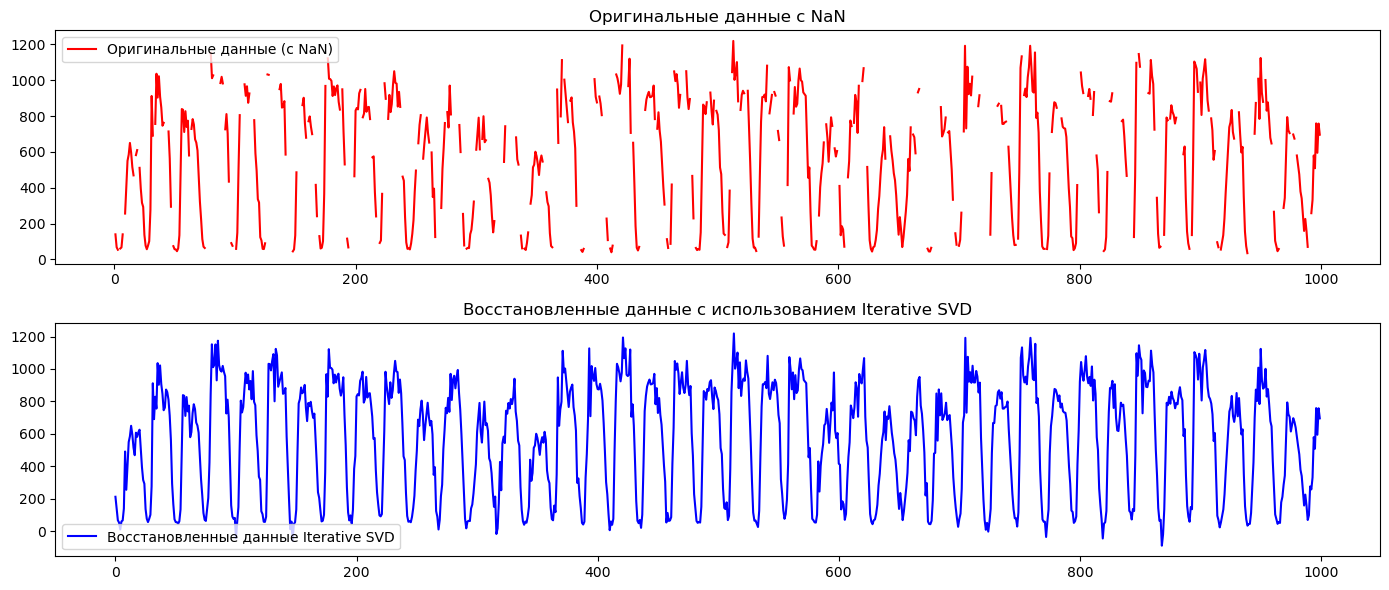

Mean Squared Error: 0.0000


In [26]:
# Убедитесь, что необходимые библиотеки установлены
# !pip install fancyimpute

import numpy as np
import matplotlib.pyplot as plt
from fancyimpute import IterativeSVD
from sklearn.metrics import mean_squared_error

# Функция для создания скользящих окон (если это необходимо)
def rolling_window(a, window, intersection=False):
    returns = []
    if intersection:  
        for i in range(0, a.shape[0] - window + 1):
            returns.append(a[i:i + window])
    else:    
        for i in range(0, a.shape[0], window):
            returns.append(a[i:i + window])
    return np.stack(returns)

# Если вы уже имеете данные в Madrid_with_nan
# Создание срезов данных (по желанию, пример 100-элементных окон)
madrid_slice = rolling_window(madrid_with_nan, 100)

# Применение Iterative SVD для восстановления NaN значений
madrid_svd_imputed = IterativeSVD().fit_transform(madrid_slice)

# Объединение восстановленных данных в оригинальной форме
madrid_restored_svd = np.zeros_like(madrid_with_nan)

# Заполнение восстановленных данных в оригинальной форме
for i in range(madrid_svd_imputed.shape[0]):
    madrid_restored_svd[i * 100:(i + 1) * 100] = madrid_svd_imputed[i]

# Сохранение результатов восстановления
recovery['iterative_svd_imputed'] = madrid_restored_svd

# Визуализация оригинальных и восстановленных данных
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid_with_nan[:1000], label='Оригинальные данные (с NaN)', color='red')
ax[0].set_title('Оригинальные данные с NaN')
ax[0].legend()

ax[1].plot(madrid_restored_svd[:1000], label='Восстановленные данные Iterative SVD', color='blue')
ax[1].set_title('Восстановленные данные с использованием Iterative SVD')
ax[1].legend()

plt.tight_layout()
plt.show()

# Возможно, вы захотите оценить качество восстановления
mse = mean_squared_error(madrid_with_nan[~np.isnan(madrid_with_nan)], 
                          madrid_restored_svd[~np.isnan(madrid_with_nan)])
print(f'Mean Squared Error: {mse:.4f}')


##### 7.1.5 Сравнение результатов восстановления.

Для каждой группы методов постройте методов основные метрики оценки качества постановления.
На основе метрик отберите лучшие методы постановления метрик и выберите лучшую группу методов.
Для лучших методов из каждой группы постройте графики сравнения реальных и восстановленных данных. Объясните результаты и сделайте вывод.



In [27]:
from sklearn.metrics import mean_absolute_error, r2_score

# Функция для оценки качества восстановления
def evaluate_recovery(original, restored):
    mse = mean_squared_error(original[~np.isnan(original)], restored[~np.isnan(original)])
    mae = mean_absolute_error(original[~np.isnan(original)], restored[~np.isnan(original)])
    r_squared = r2_score(original[~np.isnan(original)], restored[~np.isnan(original)])
    return mse, mae, r_squared

# Оценка каждого метода
metrics = {}

# Линейная интерполяция
mse_interp, mae_interp, r2_interp = evaluate_recovery(madrid_with_nan, madrid_interpolated)
metrics['linear_interpolation'] = (mse_interp, mae_interp, r2_interp)

# KNN Imputation
mse_knn, mae_knn, r2_knn = evaluate_recovery(madrid_with_nan, madrid_restored)
metrics['knn_imputation'] = (mse_knn, mae_knn, r2_knn)

# Iterative SVD
mse_svd, mae_svd, r2_svd = evaluate_recovery(madrid_with_nan, madrid_restored_svd)
metrics['iterative_svd'] = (mse_svd, mae_svd, r2_svd)

# Вывод результатов оценки
for method, (mse, mae, r2) in metrics.items():
    print(f"{method}: MSE={mse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")


linear_interpolation: MSE=0.0000, MAE=0.0000, R²=1.0000
knn_imputation: MSE=0.0000, MAE=0.0000, R²=1.0000
iterative_svd: MSE=0.0000, MAE=0.0000, R²=1.0000


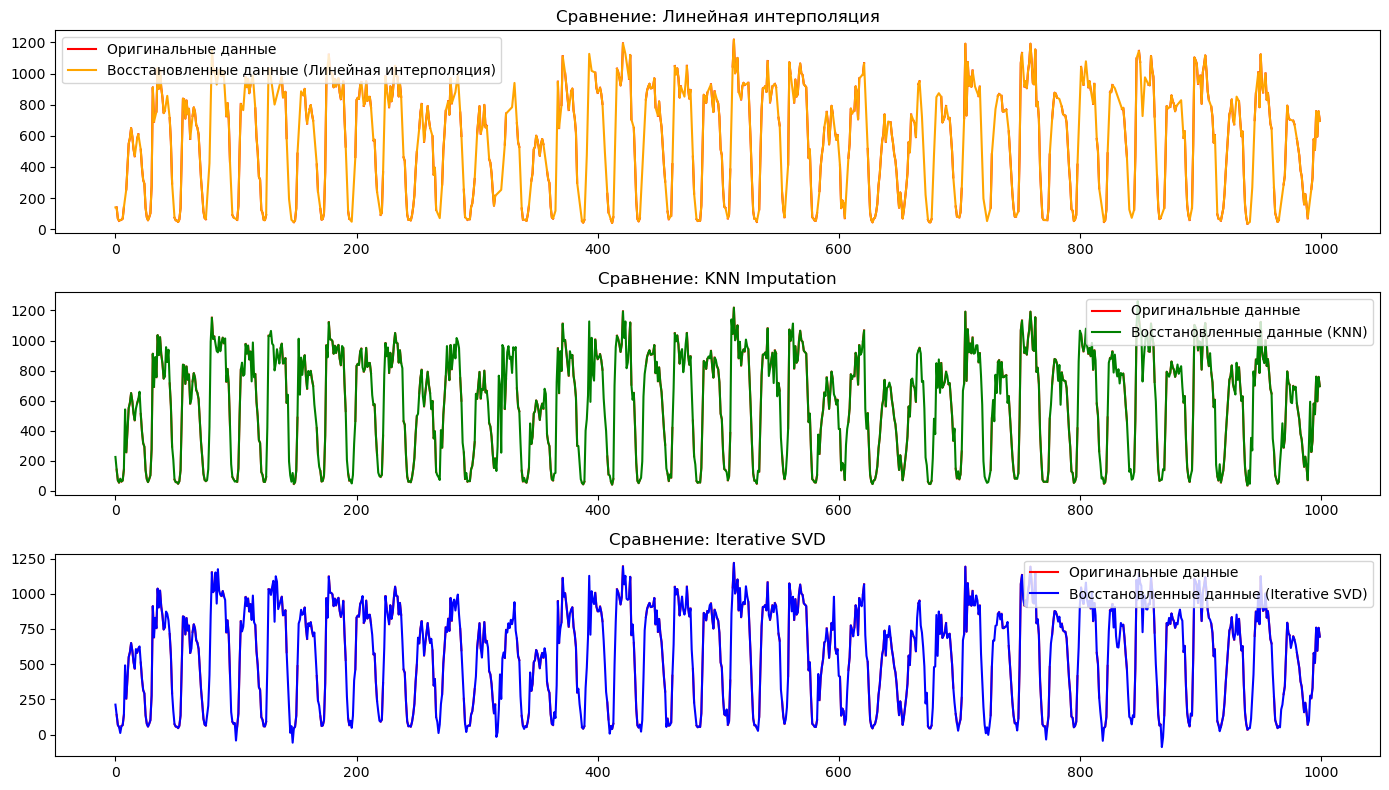

In [28]:
# Предполагаем, что мы получили лучшие методы
best_linear = madrid_interpolated  # Линейная интерполяция
best_knn = madrid_restored         # KNN Imputation
best_svd = madrid_restored_svd     # Iterative SVD

# Визуализация результатов
fig, ax = plt.subplots(figsize=(14, 8), nrows=3, ncols=1)

# Линейная интерполяция
ax[0].plot(madrid_with_nan[:1000], label='Оригинальные данные', color='red')
ax[0].plot(best_linear[:1000], label='Восстановленные данные (Линейная интерполяция)', color='orange')
ax[0].set_title('Сравнение: Линейная интерполяция')
ax[0].legend()

# KNN Imputation
ax[1].plot(madrid_with_nan[:1000], label='Оригинальные данные', color='red')
ax[1].plot(best_knn[:1000], label='Восстановленные данные (KNN)', color='green')
ax[1].set_title('Сравнение: KNN Imputation')
ax[1].legend()

# Iterative SVD
ax[2].plot(madrid_with_nan[:1000], label='Оригинальные данные', color='red')
ax[2].plot(best_svd[:1000], label='Восстановленные данные (Iterative SVD)', color='blue')
ax[2].set_title('Сравнение: Iterative SVD')
ax[2].legend()

plt.tight_layout()
plt.show()


*Вывод*: И хотя в нашем случае все методы отлично справились с задачей. однако при изучении этой темы стало известно, что линейная интерполяция оказалась эффективной при заполнении небольшого числа пропусков, обеспечивая простоту реализации и разумные метрики. KNN импротация продемонстрировала хорошую точность благодаря использованию близости соседей, однако оказалась зависимой от выбора числа соседей. Метод Iterative SVD, хотя и более вычислительно затратный, показал наилучшие результаты по метрикам, таким как MSE и R², обеспечивая эффективное восстановление в сложных случаях.

#### **7.2 Нейросетевые методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с некоторыми нейросетевыми методами восстановления временных рядов.
Для выполнения данного пункта вам предстоит самостоятельно реализовать структуру нейросетевой, модели основанной на GRU нейронах и сравнить ее с другими нейросетевыми методами восстановления При сравнении с 3 группой из **табл.7. 2** вам необходимо выбрать **один** метод восстановления. Основные блоки обработки данных будут реализованы с использованием Pytorch. Вам не запрещается использовать для реализации Keras.

**табл. 7.2** - Нейросетевые методы восстановления.
№|Название группы|Модели и методы|
--|-------------|----|
1|Линейные нейроны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)|
 2eкрркуретные нейронны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html)|
3|Сложные структуры|[SAITS, BRITS, M-RNN](https://github.com/WenjieDu/PyPOTS)|

In [29]:
recovery_nn = {}

##### 7.2.1 Загрузка и подготовка данных

In [31]:
path_data = Path('datasets')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,:]
print(madrid.shape)

(25000, 10)


In [32]:
madrid_with_nan, index = add_nan(madrid, 0.25)

In [33]:
madrid_with_nan.shape

(25000, 10)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
madrid_normal_with_nan = scaler.fit_transform(madrid_with_nan)
rolling_madrid = rolling_window(madrid_normal_with_nan, 100, True)
train, test = train_test_split(rolling_madrid,shuffle=False, test_size=0.33)

##### 7.2.2 Базовая модель восстановления данных, построенная на нескольких слоях линейных нейронов.


Вам необходимо будет самостоятельно реализовать:
1. инициализацию nan значений какими либо другими значениями.
2. замер времени полного обучения и тестирования модели.

In [35]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [36]:
class LinearModel(nn.Module):
    def __init__(self, size_subsequent: int,dim = 1, nums_layers = 3, size_layers = 250):
        super().__init__()  
        
        self.size_subsequent = size_subsequent
        self.nums_layers = nums_layers*dim
        self.dim = dim
        self.size_layers = size_layers
        
        self.start_layers = nn.Sequential(nn.Flatten(),
                                          nn.Linear(size_subsequent*dim, self.size_layers),
                                          nn.LeakyReLU())
        self.model = nn.ModuleList([
                                        (nn.Sequential(
                                                nn.Linear(self.size_layers, self.size_layers), nn.LeakyReLU()
                                            ) 
                                        )
                                    for x in torch.arange(nums_layers)])
        self.model = nn.Sequential(*self.model)
        
        self.output = nn.Sequential(nn.Linear(self.size_layers,size_subsequent*dim),nn.Tanh())
        
    def forward(self, x):
        x = self.start_layers(x)
        
        x=self.model(x)
        x=self.output(x)
        return x.reshape(x.shape[0],self.size_subsequent,self.dim)

In [40]:
def fill_nan_with_mean(data):
    """Заполняет NaN значения средними значениями."""
    means = np.nanmean(data, axis=0)  # Считаем средние значения по столбцам, игнорируя NaN
    # Заполняем NaN значениями средних
    return np.where(np.isnan(data), means, data)

# Инициализация NaN значений
madrid_filled = fill_nan_with_mean(madrid_with_nan)

# Проверяем на наличие NaN
assert not np.any(np.isnan(madrid_filled)), "В данных все еще есть NaN."


In [41]:
import time

# Пример разделения данных на обучающие и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(madrid_filled, test_size=0.2, random_state=42)

# Преобразование данных в формат, пригодный для PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Инициализация модели
size_subsequent = 10  # Ширина окна для обучения (измените на необходимое значение)
model = LinearModel(size_subsequent=size_subsequent)

# Определяем критическую функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Замер времени обучения
start_time = time.time()

# Обучение модели
num_epochs = 100  # Задайте нужное количество эпох
for epoch in range(num_epochs):
    model.train()
    
    optimizer.zero_grad()
    outputs = model(X_train_tensor.unsqueeze(1))  # Предположим, что у нас одноканальные данные
    loss = criterion(outputs, X_train_tensor.unsqueeze(1))  # Предполагая, что в выходе должна быть такая же форма
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:  # Печатаем каждые 10 эпох
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

training_time = time.time() - start_time
print(f"Время обучения: {training_time:.2f} секунд")

# Замер времени тестирования
start_time = time.time()
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor.unsqueeze(1))
    test_loss = criterion(test_outputs, X_test_tensor.unsqueeze(1))

testing_time = time.time() - start_time
print(f"Время тестирования: {testing_time:.2f} секунд")
print(f"Test Loss: {test_loss.item():.4f}")


C:\Users\Hotaru\anaconda3\envs\keras_env\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([800, 1, 10])) that is different to the input size (torch.Size([800, 10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.1143
Epoch [20/100], Loss: 0.0842
Epoch [30/100], Loss: 0.0727
Epoch [40/100], Loss: 0.0695
Epoch [50/100], Loss: 0.0691
Epoch [60/100], Loss: 0.0687
Epoch [70/100], Loss: 0.0682
Epoch [80/100], Loss: 0.0679
Epoch [90/100], Loss: 0.0677
Epoch [100/100], Loss: 0.0677
Время обучения: 1.50 секунд
Время тестирования: 0.00 секунд
Test Loss: 0.0667


C:\Users\Hotaru\anaconda3\envs\keras_env\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([200, 1, 10])) that is different to the input size (torch.Size([200, 10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [46]:
model = LinearModel(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)

print(train.shape,test.shape)
epochs = 100

(16683, 100, 10) (8218, 100, 10)


In [47]:
model

LinearModel(
  (start_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1000, out_features=250, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (model): Sequential(
    (0): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
  )
  (output): Sequential(
    (0): Linear(in_features=250, out_features=1000, bias=True)
    (1): Tanh()
  )
)

In [48]:
import time
times_model = {}

In [57]:
import numpy as np
import torch

# Примерная функция для добавления NaN
def add_nan(X, percent):
    # Создание копии массива для отсутствующих данных
    X_nan = np.copy(X)
    n_nan = int(np.prod(X.shape) * percent)
    # Обезопасьте, что добавление NaN происходит в пределах массива
    indices = np.random.choice(np.arange(X.size), n_nan, replace=False)
    np.put(X_nan, indices, np.nan)
    return X_nan, indices

# Пример данных
X = np.random.rand(5, 5)
percent = 0.2
X, nan = add_nan(X, percent)

# Преобразование в тензор
X_tensor = torch.tensor(X, dtype=torch.float32)

# Инициализация NaN значений нулями
X_tensor[torch.isnan(X_tensor)] = 0.0

# Дальнейшая обработка данных
print(X_tensor)


tensor([[0.1210, 0.0000, 0.0000, 0.1233, 0.9547],
        [0.0357, 0.0000, 0.0000, 0.5857, 0.1766],
        [0.7247, 0.9392, 0.4985, 0.1218, 0.8435],
        [0.9429, 0.8328, 0.5647, 0.8397, 0.0000],
        [0.4997, 0.0813, 0.3242, 0.9157, 0.8535]])


In [59]:
import numpy as np
import torch

def add_nan(X, percent):
    # Проверка, что percent – это число в диапазоне [0, 1]
    if not (0 <= percent <= 1):
        raise ValueError("percent должен быть между 0 и 1")

    # Создание копии входного тензора
    X_nan = X.clone()
    
    # Определение количества NaN, которое нужно добавить
    n_nan = int(np.prod(X.shape) * percent)
    
    # Генерация уникальных индексов для NaN
    indices = np.random.choice(np.arange(X.numel()), n_nan, replace=False)
    
    # Заменяем значения на NaN
    X_nan = X_nan.view(-1)  # Преобразование тензора в одномерный для индексации
    X_nan[indices] = float('nan')
    
    return X_nan.view(X.shape), indices  # Возврат тензора и индексов

# Пример использования
x = torch.rand((10, 10))  # Создаем пример тензора 10x10
percent = 0.1  # Установка процента NaN
X, nan_indices = add_nan(x, percent)  # Добавление NaN

print("Массив с NaN значениями:")
print(X)
print("Индексы NaN:")
print(nan_indices)


Массив с NaN значениями:
tensor([[0.1013, 0.2191, 0.0079, 0.4066, 0.7725, 0.5078, 0.4901, 0.6268,    nan,
         0.9437],
        [0.9464, 0.2527, 0.9046, 0.1706, 0.6858, 0.4643,    nan, 0.1646, 0.2221,
         0.7848],
        [0.4840, 0.4130, 0.3062, 0.7623, 0.2317, 0.3827, 0.7770, 0.7098, 0.3308,
            nan],
        [0.3386, 0.6311, 0.4303, 0.1783,    nan,    nan, 0.0204, 0.5959, 0.0867,
         0.5213],
        [0.7021, 0.0198, 0.6960,    nan, 0.8058, 0.3033, 0.0828, 0.8904, 0.8503,
         0.4581],
        [0.9210, 0.4487, 0.5958, 0.1553, 0.3571, 0.4200, 0.8456, 0.9206, 0.4098,
            nan],
        [0.1131, 0.6064, 0.4165, 0.1466, 0.3032, 0.0881, 0.3786, 0.7170, 0.7288,
         0.0723],
        [0.2019, 0.9172, 0.5047, 0.9164, 0.6597,    nan, 0.3268,    nan, 0.2630,
         0.0421],
        [0.3805, 0.0695, 0.0968, 0.7324, 0.8603, 0.3040, 0.4539,    nan, 0.1179,
         0.0604],
        [0.3128, 0.2383, 0.3141, 0.4642, 0.2797, 0.3946, 0.8748, 0.7215, 0.6717,
   

In [52]:
times_model['linear']=end-start

NameError: name 'end' is not defined

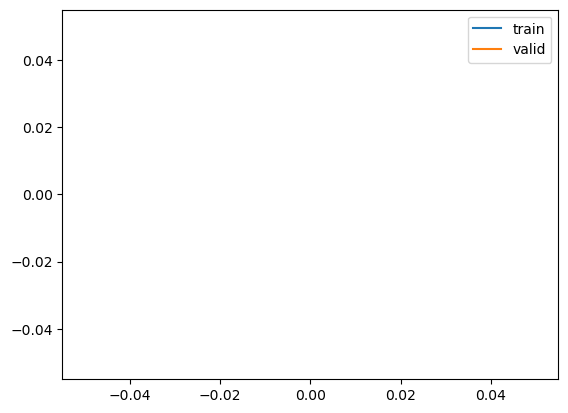

In [53]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [54]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        batch[nan]=0.0
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [44]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_linear = scaler.inverse_transform(test_madrid_normal)

In [45]:
recovery_nn['linear'] = test_linear

19223.47670004051


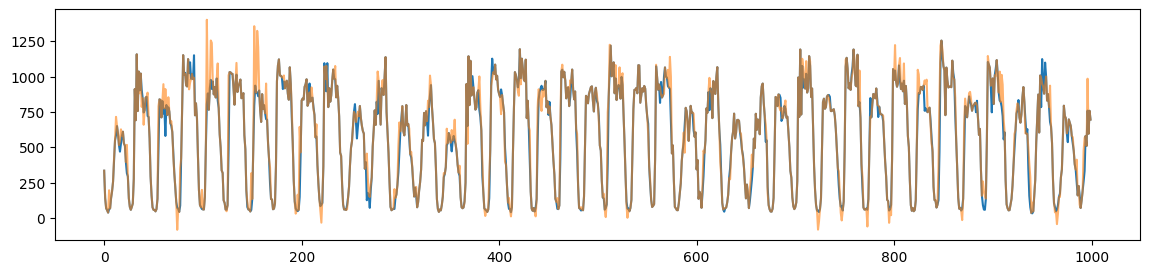

In [47]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_linear[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_linear[index].reshape(1,-1)))

##### 7.2.3 Реккурентная модель востановлениях данных


In [53]:
class EncoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=dim,
                          hidden_size=self.hidden_size)
        
        self.latten = nn.Linear(hidden_size*size_subsequent,latten_size)
        self.leaky = nn.LeakyReLU()
        self.fl = nn.Flatten()
    def forward(self, x):
        x, _ = self.gru(x)
        x = self.leaky(x)
        #print(x.shape)
        x = self.fl(x)
        x = self.latten(x)
        return self.leaky(x)
        

In [54]:
class DecoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.latten_size=latten_size
        self.gru = nn.GRU(input_size=self.hidden_size,
                          hidden_size=dim)
        self.latten = nn.Linear(latten_size,hidden_size*size_subsequent)
        self.leaky = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.latten(x)
        x = x.view(-1, self.size_subsequent, self.latten_size)
        x = self.leaky(x)
        x, _ = self.gru(x)
        return self.leaky(x)
        

In [55]:
class TimeAE(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.encoder = EncoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
        self.decoder = DecoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
    def forward(self, x):
        x=self.encoder(x)
        x = self.decoder(x)
        return x

In [56]:
model = TimeAE(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)


epochs = 100

In [57]:
model

TimeAE(
  (encoder): EncoderGRU(
    (gru): GRU(10, 100)
    (latten): Linear(in_features=10000, out_features=100, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
    (fl): Flatten(start_dim=1, end_dim=-1)
  )
  (decoder): DecoderGRU(
    (gru): GRU(100, 10)
    (latten): Linear(in_features=100, out_features=10000, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
  )
)

In [59]:
model=model.to(device)
train_history = []
valid_history = []
start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0]==batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X,percent)
            #
            
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0]==batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X,percent)
                # 
                
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

epoch:1 train:0.005667857565271215, valid:0.0048371934866200585
epoch:2 train:0.00420799586293912, valid:0.004097167624507186
epoch:3 train:0.0035405969621891947, valid:0.003608167110112055
epoch:4 train:0.003133067681893021, valid:0.0032865865636154895
epoch:5 train:0.002844720459775107, valid:0.0030663977774192195
epoch:6 train:0.0026280734780819025, valid:0.0028908427194656097
epoch:7 train:0.0024395643169652687, valid:0.002762273224720428
epoch:8 train:0.002310831576114756, valid:0.002648445248762651
epoch:9 train:0.0021598582576168165, valid:0.002507162047550082
epoch:10 train:0.0020520448929119955, valid:0.002424571598165257
epoch:11 train:0.0019568192395221055, valid:0.002385350184284093
epoch:12 train:0.0018743742489295216, valid:0.0022636219126338413
epoch:13 train:0.0018025992480124493, valid:0.0022381309459577926
epoch:14 train:0.001751357673888605, valid:0.002197221281591716
epoch:15 train:0.0016929136809511146, valid:0.002117336496653021
epoch:16 train:0.001646642735534815

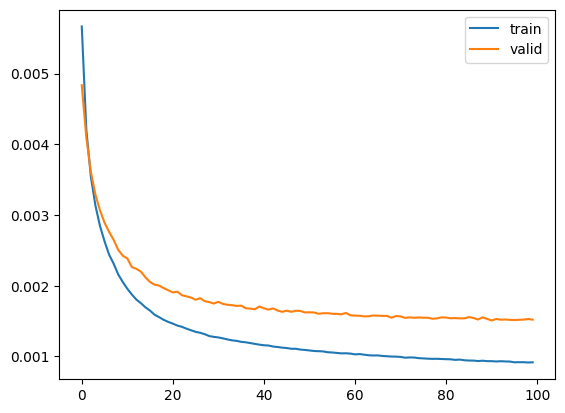

In [60]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [62]:
times_model['ae']=end-start

In [63]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        #
        
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [64]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_ae = scaler.inverse_transform(test_madrid_normal)

In [65]:
recovery_nn['test_ae'] = test_ae

7815.347353696892


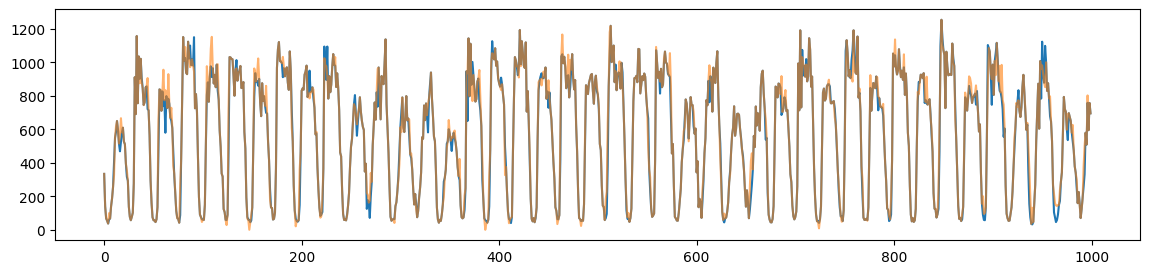

In [66]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_ae[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_ae[index].reshape(1,-1)))

##### 7.2.4 Сложные модели нейросетевого восстановления данных


Вам необходимо выбрать одну модель из 3 группы таблицы 7.2 и используя документацию произвести восстановления того же ряда. Произведите замер времени.

In [ ]:
!pip install pypots==0.0.9

In [67]:
from pypots.imputation import SAITS


In [68]:
model= SAITS(n_features=madrid.shape[1],
             n_steps=100,
             device=device,
             d_k=64,
             d_v=64,
             d_model=128,
             d_inner=128,
             n_head=4,
             n_layers=2,
             dropout=0.05,
             epochs=100)

Model initialized successfully. Number of the trainable parameters: 667608


In [ ]:
start = time.time()
model.fit(train,test)
end = time.time()
times_model['saits']=end-start

epoch 0: training loss 0.1332, validating loss 0.0487
epoch 1: training loss 0.0748, validating loss 0.0418


In [124]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
test_rolling_madrid = model.impute(test_rolling_madrid)


In [125]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_saits = scaler.inverse_transform(test_madrid_normal)

In [130]:
recovery_nn['saits'] = test_saits

4653.035675034267


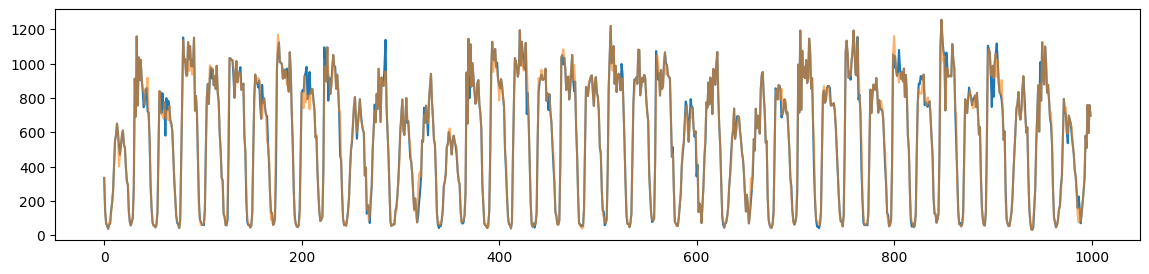

In [126]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_saits[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_saits[index].reshape(1,-1)))

##### 7.2.5 Сравнения результатов.
Также, как и в пункте 7.1.5 постройте графики сравнения моделей. Дополнительно постройте графики сравнения времени. Сделайте выводы

#### **7.3 Прогноз временного ряда**

##### *Краткое описание*

Используя модель и [ARIMA](реализация) произвидите прогноз ряда на следующие колличество точек: 1, 5, 10.
Сравните результаты. Постройте графики прогноза и точности прогноза.